In [1]:
import tensorflow as tf
from tensorflow import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization, MaxPooling2D

### Načteme data

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### Připravíme data

In [4]:
X_train = X_train / 255.
X_valid = X_valid / 255.
X_test = X_test / 255.

In [5]:
import numpy as np 

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

### Vytvoříme model

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, 2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D()
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(32, 2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)         

In [10]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [11]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid),
                     callbacks=[early_stopping])

Epoch 1/20
1719/1719 [==============================] - 48s 10ms/step - loss: 0.5648 - accuracy: 0.7918 - val_loss: 0.3555 - val_accuracy: 0.8696
Epoch 2/20
1719/1719 [==============================] - 16s 10ms/step - loss: 0.3950 - accuracy: 0.8568 - val_loss: 0.3006 - val_accuracy: 0.8922
Epoch 3/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3508 - accuracy: 0.8724 - val_loss: 0.2652 - val_accuracy: 0.9058
Epoch 4/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3230 - accuracy: 0.8817 - val_loss: 0.2548 - val_accuracy: 0.9084
Epoch 5/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3035 - accuracy: 0.8879 - val_loss: 0.2406 - val_accuracy: 0.9128
Epoch 6/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2906 - accuracy: 0.8927 - val_loss: 0.2405 - val_accuracy: 0.9144
Epoch 7/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2820 - accuracy: 0.8961 - val_loss: 0.2253 - val_

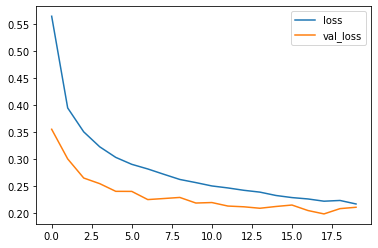

In [15]:
import pandas as pd
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

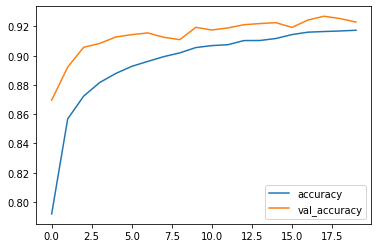

In [16]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

### Vyzkoušíme na testovacích datech

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2225 - accuracy: 0.9225


[0.22245390713214874, 0.9225000143051147]

**Pomocí DNN nebo SVM jsme se dostali na 88% správnost, zde jsme na 91 %. Chyba se tedy zmenšila relativně o zhruba 30 %.**